Index(['TEAM_ID', 'Home_Away', 'MATCHUP_ID', 'FG_PCT_DIFF', 'FG3_PCT_DIFF',
       'FT_PCT_DIFF', 'TS%_DIFF', 'eFG%_DIFF', 'AST%_DIFF', 'ORtg_DIFF',
       'PER%_DIFF', 'YEAR', 'MONTH', 'DAY', 'WL_encoded'],
      dtype='object')


C:\Users\ghadf\AppData\Local\Temp\ipykernel_19120\2516241960.py:48: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = preprocessor_data.corr()


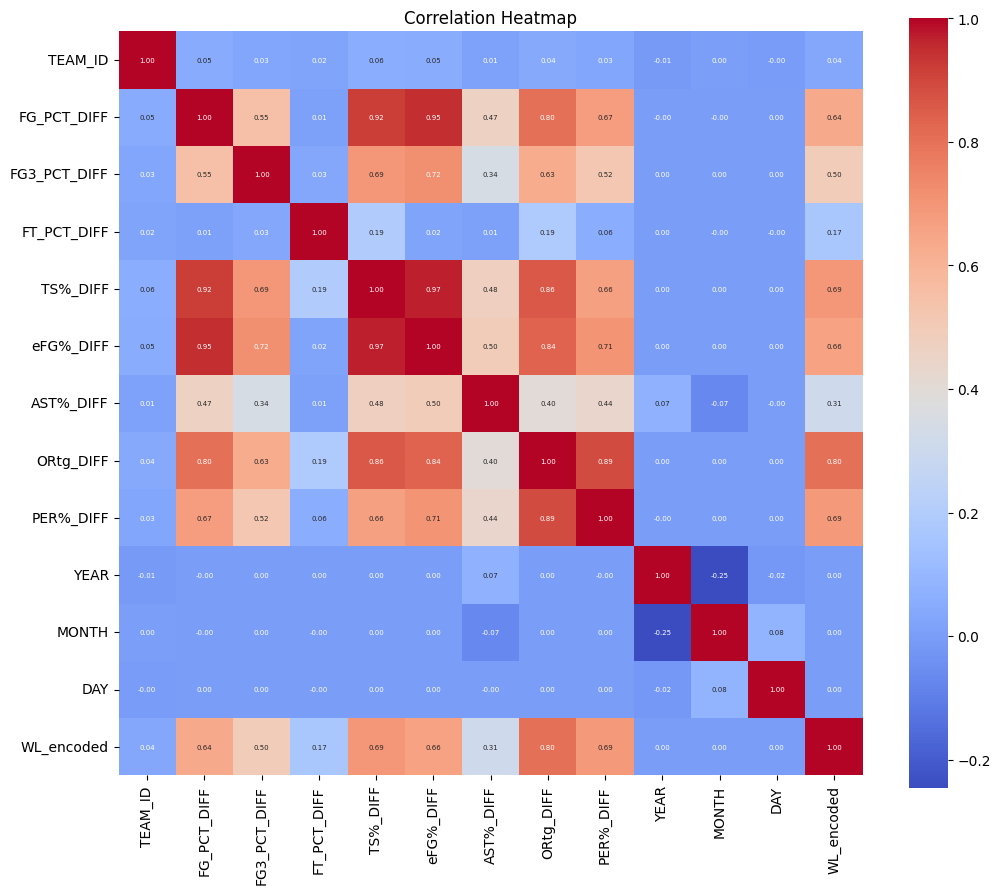

In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn import preprocessing
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from joblib import dump, load



# Load the data
data = pd.read_csv(r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\data\nba_threeptera_prepreprocess_data.csv')

# Sort the data by TEAM_ID and GAME_DATE for the training data
data.sort_values(by=['TEAM_ID', 'GAME_DATE'], ascending=[True, True], inplace=True)

# Reorder the columns in the DataFrame to place 'WL_encoded' at the end
preprocessor_data = data[[col for col in data.columns if col != 'WL'] + ['WL']]

#drop the columns that are not needed
x_excluded_independent_variables = [ 'TEAM_ABBREVIATION', 'WL', 'FGA', 'TOV', 'TEAM_NAME', 'GAME_ID', 'PPM', 'RPM', 'APM', 'SPM', 'BPM', 'TPM',   
                                    'FG_PCT', 'FG3_PCT', 'FT_PCT', 'PLUS_MINUS', 'TS%', 'ORtg', 'PER%', 'PTS_PER_MIN', 'eFG%', 'AST%', 'PTS_PER_MIN_DIFF', 'PTS_DIFF',
                                    'PER', 'OPM', 'DPM', 'USG%', 'FG3A', 'OREB', 'PF', 'MIN', 'PTS', 'FGM', 'FG3M', 'FTM', 'FTA', 'PTS', 'REB', 
                                    'AST', 'PF', 'STL', 'BLK', 'DREB', 'Offensive_Possessions', 'SEASON_ID', 'MATCHUP', 'GAME_DATE', #, 
                                    'PTS_OPP', 'FGM_OPP', 'FG3M_OPP', 'FTM_OPP', 'FTA_OPP', 'PTS_OPP', 'REB_OPP', 'OREB_OPP', 'FGA_OPP', 'FG3A_OPP', 'OREB_OPP', 
                                    'AST_OPP', 'TOV_OPP', 'STL_OPP', 'BLK_OPP', 'SEASON_ID_OPP', 'Home_Away_OPP' #,  'Defensive_Possessions'
                                    , 'TEAM_NAME_OPP', 'WL_OPP', 'MIN_OPP', 'PF_OPP', 'DREB_OPP','PTS_PER_MIN_OPP', 'TEAM_ID_OPP'] #

#drop the columns that are not needed
preprocessor_data = preprocessor_data.drop(x_excluded_independent_variables, axis=1)
print(preprocessor_data.columns)

# Create a correlation matrix for the selected columns
correlation_matrix = preprocessor_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True,
            annot_kws={'size': 5})  # Adjust the font size (here it's set to 8)


plt.title('Correlation Heatmap')
plt.show()

In [2]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Define the columns for the dependent (y) and independent (X) variables
y_column = 'WL_encoded'
columns_to_drop = [y_column]


# Define feature lists
categorical_features = ['TEAM_ID', 'Home_Away', 'MATCHUP_ID'] #, 'TEAM_ID_OPP'
numerical_features = [col for col in preprocessor_data.columns if col not in categorical_features + columns_to_drop]

# Transformers
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

one_hot_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine the transformers using ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numerical_transformer, numerical_features),
    ('one_hot', one_hot_transformer, categorical_features)
])

# Apply the preprocessor to the data
X = preprocessor_data.drop(columns=columns_to_drop, axis=1)
y = preprocessor_data[y_column]

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Fit the preprocessor to the data
preprocessor.fit(X)

# Transform the data using the already fitted preprocessor
X_preprocessed = preprocessor.transform(X)

#to dense matrix
X_preprocessed = X_preprocessed.toarray()


print('Before preprocessing = ', X.shape)
print('After preprocessing = ', X_preprocessed.shape)
print('y shape = ', y_encoded.shape)

# Checking if there are any null values after preprocessing
print(pd.DataFrame(X_preprocessed).isnull().sum())


Before preprocessing =  (13740, 14)
After preprocessing =  (13740, 478)
y shape =  (13740,)
0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0

In [3]:
# Hyperparameters
BATCH_SIZE = 32
NUM_EPOCHS = 100
LEARNING_RATE = 0.001
HIDDEN_SIZE = 128
TEST_SIZE = 0.2
RANDOM_STATE = 42
seq_length = 5  # Last 5 games
dropout_rate = 0.3


In [4]:
from torch.utils.data import Dataset

class NBADataset(Dataset):
    def __init__(self, X, y, sequence_length):
        self.X = X
        self.y = y
        self.sequence_length = sequence_length
        #print("Shape of self.X in __init__:", self.X.shape)  # Debug print

    def __len__(self):
        return len(self.X) - self.sequence_length

    def __getitem__(self, index):
        X_seq = self.X[index]
        y_seq = self.y[index]
        #print("Shape of X_seq:", X_seq.shape)  # Debug print
        #print("Shape of y_seq:", y_seq.shape)  # Debug print
        return X_seq, y_seq



In [5]:
import numpy as np

# Create sequences
def create_sequences(X, y, team_ids, seq_length):
    sequences = []
    target = []
    for team in np.unique(team_ids):
        team_indices = np.where(team_ids == team)[0]
        X_team = X.iloc[team_indices] if isinstance(X, pd.DataFrame) else X[team_indices]
        
        if y is not None:
            y_team = y.iloc[team_indices] if isinstance(y, pd.DataFrame) else y[team_indices]
        
        for i in range(len(X_team) - seq_length):
            seq = X_team.iloc[i:i + seq_length] if isinstance(X_team, pd.DataFrame) else X_team[i:i + seq_length]
            
            if y is not None:
                label = y_team.iloc[i + seq_length] if isinstance(y_team, pd.DataFrame) else y_team[i + seq_length]
                target.append(label)
                
            sequences.append(seq)

    return np.array(sequences), np.array(target) if y is not None else None





team_ids = preprocessor_data['TEAM_ID'].values  # Make sure to extract this before preprocessing
X_seq, y_seq = create_sequences(X_preprocessed, y_encoded, team_ids, seq_length)


# Split your sequences into training and test sets
from sklearn.model_selection import train_test_split
X_train_seq, X_test_seq, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)


In [6]:
# Convert to PyTorch tensors
import torch
X_train_tensor = torch.tensor(X_train_seq.astype(np.float32))
y_train_tensor = torch.tensor(y_train.astype(np.float32))
X_test_tensor = torch.tensor(X_test_seq.astype(np.float32))
y_test_tensor = torch.tensor(y_test.astype(np.float32))

# DataLoader setup
from torch.utils.data import DataLoader

train_dataset = NBADataset(X_train_seq, y_train, seq_length)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

test_dataset = NBADataset(X_test_seq, y_test, seq_length)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Debug: Print shapes for clarity
print("Shape of X_train_tensor:", X_train_tensor.shape)
print("Shape of y_train_tensor:", y_train_tensor.shape)
print("Shape of X_test_tensor:", X_test_tensor.shape)
print("Shape of y_test_tensor:", y_test_tensor.shape)

Shape of X_train_tensor: torch.Size([10872, 5, 478])
Shape of y_train_tensor: torch.Size([10872])
Shape of X_test_tensor: torch.Size([2718, 5, 478])
Shape of y_test_tensor: torch.Size([2718])


In [7]:
#Two key factors for dropout layers
#1. Location: Try placing dropout layers after the activation functions, typically after ReLU activations.
#2. Rate: You might want to experiment with different dropout rates. 
#A common starting value is 0.5, but this might be too high depending on your specific network architecture.

class LSTM1(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM1, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        # Define the LSTM layer
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        
        # Define the first fully connected layer
        self.fc_1 = nn.Linear(hidden_size, 128)
        
        # Define the ReLU activation function
        self.relu = nn.ReLU()
        
        # Define the second fully connected layer
        self.fc = nn.Linear(128, num_classes)
        
        # Define the dropout layer
        self.dropout = nn.Dropout(dropout_rate)  # You can experiment with the dropout rate

    def forward(self, x):
        # No need to unsqueeze as x already has 3 dimensions: [batch_size, seq_length, num_features]
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        output, _ = self.lstm(x, (h_0, c_0))
        
        # Get the output of the last time step
        hn = output[:, -1, :]
        
        # Pass through first fully connected layer
        out = self.fc_1(hn)
        
        # Apply dropout
        out = self.dropout(out)
        
        # Apply ReLU activation
        out = self.relu(out)
        
        # Pass through second fully connected layer to get the output
        out = self.fc(out)
        
        return out.squeeze()


In [8]:
# Model, Loss, Optimizer Setup
input_size = X_train_tensor.shape[2]
model = LSTM1(1, input_size, HIDDEN_SIZE, 1).float()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.BCEWithLogitsLoss()


In [9]:
losses = []  # Initialize an empty list to store losses

# Training
for epoch in range(NUM_EPOCHS):
    epoch_loss = 0  # Reset epoch loss
    for features, labels in train_loader:
        #print("Shape of features:", features.shape)  # Debug line
        optimizer.zero_grad()
        outputs = model(features.float())  # Ensure float type
        loss = criterion(outputs, labels.float())  # Directly use labels without unsqueezing
        epoch_loss += loss.item()  # Accumulate loss
        loss.backward()
        optimizer.step()

    # Only save and print every 10 epochs
    if (epoch + 1) % 10 == 0:
        average_epoch_loss = epoch_loss / len(train_loader)
        losses.append(average_epoch_loss)
        print(f"Epoch {epoch+1}/{NUM_EPOCHS}, Loss: {average_epoch_loss:.4f}")

# Plotting the loss over epochs
plt.plot(range(10, NUM_EPOCHS+1, 10), losses)
plt.title("Training Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

Epoch 10/100, Loss: 0.1535
Epoch 20/100, Loss: 0.0214
Epoch 30/100, Loss: 0.0109
Epoch 40/100, Loss: 0.0000
Epoch 50/100, Loss: 0.0000


In [ ]:
# Evaluation
model.eval()
all_predictions = []
all_labels = []
with torch.no_grad():
    for features, labels in test_loader:
        outputs = model(features.float())
        predicted = (torch.sigmoid(outputs).data > 0.5).float()
        all_predictions.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

print('Accuracy: {:.2f}%'.format(100 * sum(np.array(all_predictions) == np.array(all_labels)) / len(all_labels)))

# Confusion Matrix & Classification Report
confusion = confusion_matrix(all_labels, all_predictions)
print("Confusion Matrix:")
print(confusion)

report = classification_report(all_labels, all_predictions)
print("\nClassification Report:")
print(report)

Accuracy: 52.86%
Confusion Matrix:
[[673 702]
 [575 759]]

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.49      0.51      1375
           1       0.52      0.57      0.54      1334

    accuracy                           0.53      2709
   macro avg       0.53      0.53      0.53      2709
weighted avg       0.53      0.53      0.53      2709



In [ ]:
#Save Model and preprocessor

# Save Model and Preprocessor Paths
pipeline_save_path = r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\preprocessing\lstm_seq_nn_preprocessor.joblib'
model_save_path = r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\nba_models\lstm_seq_nn_model.pth'


# Save the preprocessor
dump(preprocessor, pipeline_save_path)

# Save the LSTM model
torch.save(model.state_dict(), model_save_path)


In [ ]:
# Load the Preprocessor and Model
loaded_pipeline = load(pipeline_save_path)

model = LSTM1(1, input_size, HIDDEN_SIZE, 1).float()
model.load_state_dict(torch.load(model_save_path))
model.eval()  # Set the model to evaluation mode

LSTM1(
  (lstm): LSTM(478, 128, batch_first=True)
  (fc_1): Linear(in_features=128, out_features=128, bias=True)
  (relu): ReLU()
  (fc): Linear(in_features=128, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

In [ ]:
#read "unseen" data so we can test what these models would predict for the 2022 playoffs
#prediction_data = pd.read_csv(r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\data\nba_test_unseen_dataset.csv')
prediction_data = pd.read_csv(r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\data\23_24_season_games_clean.csv')

#print(prediction_data.head())

# Drop the columns that are not needed Matchup
prediction_data = prediction_data.drop(columns=['PTS_PER_MIN', 'PTS_DIFF', 'PTS_PER_MIN_DIFF','FG_PCT', 'FG3_PCT', 'FT_PCT', 'PLUS_MINUS', 'TS%', 'ORtg', 'PER%', 'eFG%', 'AST%', ])
    
# Define the desired feature order
#feature_order = ['TEAM_ID', 'MATCHUP', 'FG_PCT', 'FG3_PCT', 'FT_PCT', 'PLUS_MINUS', 'Home_Away', 'FG_PCT_OPP', 'FG3_PCT_OPP', 
                  #'FT_PCT_OPP', 'PLUS_MINUS_OPP', 'TS%', 'ORtg', 'PER%', 'eFG%', 'AST%', 'TS%_OPP', 'eFG%_OPP', 'AST%_OPP', 
                 #'DRtg', 'DPER%', 'YEAR', 'MONTH', 'DAY',
                 #'FG_PCT_DIFF','FG3_PCT_DIFF','FT_PCT_DIFF','TS%_DIFF','eFG%_DIFF','AST%_DIFF','ORtg_DIFF','PER%_DIFF'] #, 'MATCHUP'

feature_names = [
                     'FG_PCT_DIFF', 'FG3_PCT_DIFF', 'FT_PCT_DIFF', 'TS%_DIFF', 'eFG%_DIFF', 'AST%_DIFF', 'ORtg_DIFF', 'PER%_DIFF', 'YEAR', 'MONTH', 'DAY', 'TEAM_ID', 
                      'Home_Away', 'MATCHUP_ID'] #'TEAM_ID_OPP',

feature_order = [#'PTS_PER_MIN', 'PTS_DIFF', 'PTS_PER_MIN_DIFF', 'TEAM_ID_OPP', 'FG_PCT', 'FG3_PCT', 'FT_PCT', 'PLUS_MINUS',  'FG_PCT_OPP', 'FG3_PCT_OPP',  'SEASON_ID', 'GAME_ID'
                   #'TS%', 'ORtg', 'PER%', 'eFG%', 'AST%', 'FT_PCT_OPP', 'PLUS_MINUS_OPP','TS%_OPP', 'eFG%_OPP', 'AST%_OPP', , 'MATCHUP'
                  'Home_Away', 'YEAR', 'MONTH', 'DAY', 'MATCHUP_ID','TEAM_ID', #'DRtg', 'DPER%',
                 'FG_PCT_DIFF','FG3_PCT_DIFF','FT_PCT_DIFF','TS%_DIFF','eFG%_DIFF','AST%_DIFF','ORtg_DIFF','PER%_DIFF'] #, 'MATCHUP'

#drop columns if they are in x_excluded_independent_variables or if they aren't
prediction_data = prediction_data[feature_names]
#prediction_data = prediction_data.drop(x_excluded_independent_variables, axis=1)

#does feature_names = feature_order?
print(len(feature_names))
print(len(feature_order))

# Reorder columns in the new_data DataFrame
prediction_data = prediction_data[feature_order]
print(prediction_data.head())
print(prediction_data.shape)

14
14
  Home_Away  YEAR  MONTH  DAY MATCHUP_ID     TEAM_ID  FG_PCT_DIFF  \
0      Home  2023     10   30     DALMEM  1610612763    -0.017237   
1      Home  2023     10   30     BKNCHA  1610612766     0.013302   
2      Away  2023     10   30     PORTOR  1610612757     0.019883   
3      Away  2023     10   30     ATLMIN  1610612750     0.012922   
4      Home  2023     10   30     PORTOR  1610612761    -0.006298   

   FG3_PCT_DIFF  FT_PCT_DIFF  TS%_DIFF  eFG%_DIFF  AST%_DIFF  ORtg_DIFF  \
0      0.007144     0.034990 -0.003094  -0.008494  -1.041356  -4.193096   
1     -0.000834     0.013812  0.012762   0.014057   0.185400   3.186128   
2      0.010009    -0.005962  0.023571   0.022892   4.684095   5.098239   
3      0.008698     0.018127  0.016331   0.013279   1.581859   2.681900   
4      0.002635    -0.000534 -0.001912  -0.003554   1.914168  -4.692195   

   PER%_DIFF  
0  -9.839759  
1   5.124150  
2   8.691714  
3   2.359626  
4  -7.367347  
(22, 14)


In [ ]:
#add in the last 5 games for each team

def get_last_n_games(team_id, n, historical_data):
    return historical_data[historical_data['TEAM_ID'] == team_id].tail(n)

# Initialize an empty DataFrame to hold the new "unseen" data with appended historical games
new_prediction_data = pd.DataFrame()

# Iterate over each unique team in the "unseen" data
for team in prediction_data['TEAM_ID'].unique():
    team_data = prediction_data[prediction_data['TEAM_ID'] == team]
    
    # Get the last n games for this team from the historical data
    last_n_games = get_last_n_games(team, seq_length, X)
    
    # Append the last n games to this team's "unseen" data
    new_team_data = pd.concat([last_n_games, team_data])
    
    # Append this team's new "unseen" data to the overall new "unseen" data
    new_prediction_data = pd.concat([new_prediction_data, new_team_data])

print(new_prediction_data.head())
print(new_prediction_data.shape)

# Now, new_prediction_data contains the "unseen" data appended with the last n historical games for each team


          TEAM_ID Home_Away MATCHUP_ID  FG_PCT_DIFF  FG3_PCT_DIFF  \
11979  1610612763      Away     MEMMIA     0.110429     -0.010061   
11978  1610612763      Away     MEMMIL    -0.002612     -0.038667   
11977  1610612763      Home     MEMNOP     0.052588      0.158500   
11976  1610612763      Home     DENMEM     0.030909      0.075378   
11975  1610612763      Away     MEMWAS     0.001108     -0.056174   

       FT_PCT_DIFF  TS%_DIFF  eFG%_DIFF  AST%_DIFF  ORtg_DIFF  PER%_DIFF  \
11979     0.012333  0.055283   0.075441  32.357277   7.066527  11.924669   
11978    -0.067000 -0.013756  -0.005675  30.965986   5.955956  16.929429   
11977    -0.027273  0.065143   0.069425  25.277090   6.800806   7.764849   
11976    -0.166333  0.018808   0.051337  30.087224  -0.393955   3.765555   
11975    -0.227273 -0.007877  -0.016838  25.114144   9.059789   1.755172   

       YEAR  MONTH  DAY  
11979  2023     10   15  
11978  2023     10   20  
11977  2023     10   25  
11976  2023     10   27 

In [ ]:
# Ensure prediction_data has the right columns
assert set(feature_order).issubset(prediction_data.columns), "Some features are missing in the unseen data."


# Preprocess the entire new_prediction_data DataFrame
new_prediction_data_preprocessed = loaded_pipeline.transform(new_prediction_data)
new_prediction_data_preprocessed = new_prediction_data_preprocessed.toarray() 

# Create sequences on the preprocessed data
team_ids_new = new_prediction_data['TEAM_ID'].values  # Extract team IDs from the new data
X_raw, _ = create_sequences(new_prediction_data_preprocessed, None, team_ids_new, seq_length)

# Convert to tensor
X_new_tensor = torch.tensor(X_raw.astype(np.float32))



In [ ]:
# Use the trained model to make predictions
logits = model(X_new_tensor)
probabilities = torch.sigmoid(logits)
predicted_labels = (probabilities > 0.5).float()

# Add predictions to a new DataFrame (since the number of rows will differ due to sequence creation)
prediction_results = pd.DataFrame(predicted_labels.detach().numpy(), columns=['PREDICTION'])

# Reset the index of prediction_data to make sure it aligns with prediction_results
prediction_data.reset_index(drop=True, inplace=True)

# Concatenate the prediction results to the original DataFrame
prediction_data_with_results = pd.concat([prediction_data, prediction_results], axis=1)

print(prediction_data_with_results.head())
print(prediction_data_with_results.shape)


  Home_Away  YEAR  MONTH  DAY MATCHUP_ID     TEAM_ID  FG_PCT_DIFF  \
0      Home  2023     10   30     DALMEM  1610612763    -0.017237   
1      Home  2023     10   30     BKNCHA  1610612766     0.013302   
2      Away  2023     10   30     PORTOR  1610612757     0.019883   
3      Away  2023     10   30     ATLMIN  1610612750     0.012922   
4      Home  2023     10   30     PORTOR  1610612761    -0.006298   

   FG3_PCT_DIFF  FT_PCT_DIFF  TS%_DIFF  eFG%_DIFF  AST%_DIFF  ORtg_DIFF  \
0      0.007144     0.034990 -0.003094  -0.008494  -1.041356  -4.193096   
1     -0.000834     0.013812  0.012762   0.014057   0.185400   3.186128   
2      0.010009    -0.005962  0.023571   0.022892   4.684095   5.098239   
3      0.008698     0.018127  0.016331   0.013279   1.581859   2.681900   
4      0.002635    -0.000534 -0.001912  -0.003554   1.914168  -4.692195   

   PER%_DIFF  PREDICTION  
0  -9.839759         1.0  
1   5.124150         0.0  
2   8.691714         1.0  
3   2.359626         0.0  

In [ ]:

# Convert YEAR, MONTH, DAY into a date column
prediction_data_with_results['Date'] = pd.to_datetime(prediction_data_with_results[['YEAR', 'MONTH', 'DAY']])
prediction_data_with_results = prediction_data_with_results.sort_values(by=['Date'])

# Merge with unique teams data
df1 = pd.read_csv(r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\data\team_ids.csv')
unique_teams = df1[['TEAM_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION']].drop_duplicates()
prediction_data_with_results = prediction_data_with_results.merge(unique_teams, on='TEAM_ID', how='left')

# Drop unnecessary columns
columns_to_drop = ["TEAM_ID", "YEAR", "MONTH", "DAY"]
prediction_data_with_results = prediction_data_with_results.drop(columns=columns_to_drop)

# filter for todays games
today = pd.Timestamp.today().normalize()
prediction_data_with_results = prediction_data_with_results[prediction_data_with_results['Date'] == today]

# Display summarized results
season_pred = prediction_data_with_results  # Assuming you want all columns. Adjust accordingly.
print(season_pred.head())

# Save the predictions
#season_pred.to_csv(r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\data\ltsm_seq_season_pred.csv', index=False)
print(season_pred.shape)

  Home_Away MATCHUP_ID  FG_PCT_DIFF  FG3_PCT_DIFF  FT_PCT_DIFF  TS%_DIFF  \
0      Home     DALMEM    -0.017237      0.007144     0.034990 -0.003094   
1      Home     LALORL    -0.019537      0.002018     0.032660 -0.013933   
2      Away     CHIIND     0.002294      0.006218    -0.017808  0.011706   
3      Away     BKNCHA    -0.008572     -0.008035    -0.005890 -0.013686   
4      Home     CHIIND    -0.005461     -0.002511     0.002496 -0.003082   

   eFG%_DIFF  AST%_DIFF  ORtg_DIFF  PER%_DIFF  PREDICTION       Date  \
0  -0.008494  -1.041356  -4.193096  -9.839759         1.0 2023-10-30   
1  -0.015282  -0.836455  -1.819695  -1.324407         1.0 2023-10-30   
2   0.009900   1.763061   2.627943   3.670827         1.0 2023-10-30   
3  -0.013782  -1.506063  -0.480572   1.015266         0.0 2023-10-30   
4  -0.005993  -2.099739  -0.642962  -3.190193         0.0 2023-10-30   

            TEAM_NAME TEAM_ABBREVIATION  
0   Memphis Grizzlies               MEM  
1  Los Angeles Lakers     

In [ ]:

# Display results by each team
for team_name in season_pred['TEAM_NAME'].unique():
    team_results = season_pred[season_pred['TEAM_NAME'] == team_name]
    print(f"Results for {team_name} (TEAM_NAME {team_name}):")
    print(team_results.groupby(['TEAM_NAME', 'PREDICTION']).size().reset_index(name='COUNT'))
    print("-------------------------------")

KeyError: 'TEAM_NAME_y'

In [ ]:
from datetime import datetime
import pandas as pd
import os

# 1. Create a DataFrame for today's outcomes based on prediction_data
today_predictions = prediction_data_with_results.copy()

# 2. Add today's date and recording timestamp
today_predictions['date_prediction_recorded'] = pd.Timestamp.today()

#filter for ATLCHA matchup_id
#today_predictions = today_predictions[today_predictions['MATCHUP_ID'] == 'ATLCHA']

# Define the path to the saved predictions
saved_predictions_path = r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\data\ltsm_seq_season_pred.csv'

# 3. Check if the saved predictions file exists
if not os.path.exists(saved_predictions_path):
    # If it doesn't exist, create it from today's predictions
    today_predictions.to_csv(saved_predictions_path, index=False)
    print(today_predictions.shape)
else:
    # If it exists, load it and update
    saved_predictions = pd.read_csv(saved_predictions_path)
    # Normalize the 'Date' column to remove time portion
    saved_predictions['Date'] = pd.to_datetime(saved_predictions['Date']).dt.normalize()

    print(saved_predictions.shape)

    print(today_predictions.shape)
    # 4. Concatenate existing and new predictions
    all_predictions = pd.concat([saved_predictions, today_predictions], ignore_index=True)
    
    # 5. Sort by date recorded, matchup id, and home_away
    all_predictions.sort_values(by=['date_prediction_recorded', 'MATCHUP_ID', 'Home_Away'], ascending=[True, True, True], inplace=True)
    
    # 6. Remove duplicates, keeping only the newest entry and not deleting previous days predictions
    all_predictions.drop_duplicates(subset=['MATCHUP_ID', 'TEAM_NAME_y', 'Date'], keep='first', inplace=True)
    
    # Sort by date and reset index
    all_predictions = all_predictions.sort_values(by=['Date']).reset_index(drop=True)
    
    # 7. Save the updated DataFrame back to CSV
    all_predictions.to_csv(saved_predictions_path, index=False)

# 8. Display the results
print(all_predictions.head())
print(all_predictions.shape)

(22, 16)
(22, 17)
  Home_Away MATCHUP_ID  FG_PCT_DIFF  FG3_PCT_DIFF  FT_PCT_DIFF  TS%_DIFF  \
0      Away     ATLMIN     0.012922      0.008698     0.018127  0.016331   
1      Home     MIAMIL    -0.033418     -0.006966     0.013636 -0.037310   
2      Away     MIAMIL     0.001437      0.001415    -0.006147  0.005000   
3      Home     LALORL    -0.019537      0.002018     0.032660 -0.013933   
4      Away     LALORL     0.022096      0.019060     0.001038  0.026980   

   eFG%_DIFF  AST%_DIFF  ORtg_DIFF  PER%_DIFF       Date  \
0   0.013279   1.581859   2.681900   2.359626 2023-10-30   
1  -0.037725  -2.016231  -7.109305  -9.163026 2023-10-30   
2   0.004323   0.264812   0.304050  -0.688743 2023-10-30   
3  -0.015282  -0.836455  -1.819695  -1.324407 2023-10-30   
4   0.029961   2.486327   4.425442   5.867107 2023-10-30   

              TEAM_NAME_x TEAM_ABBREVIATION_x             TEAM_NAME_y  \
0  Minnesota Timberwolves                 MIN  Minnesota Timberwolves   
1         Milwauke

In [ ]:
#print just predictions and matchup_id
#print(all_predictions[['MATCHUP_ID', 'TEAM_NAME', 'PREDICTION']])

#filter all_predictions for just today
today = pd.Timestamp.today().normalize()
all_predictions = all_predictions[all_predictions['Date'] == today]

# sum prediction column by matchup_id
all_predictions['prediction_sum'] = all_predictions.groupby('MATCHUP_ID')['PREDICTION'].transform('sum')
#filter non 1's in count
#all_predictions = all_predictions[all_predictions['prediction_sum'] != 1]
print(all_predictions[['MATCHUP_ID', 'TEAM_NAME_y', 'PREDICTION', 'prediction_sum']])


   MATCHUP_ID             TEAM_NAME_y  PREDICTION  prediction_sum
0      ATLMIN  Minnesota Timberwolves         0.0             1.0
1      MIAMIL         Milwaukee Bucks         0.0             1.0
2      MIAMIL              Miami Heat         1.0             1.0
3      LALORL      Los Angeles Lakers         0.0             0.0
4      LALORL           Orlando Magic         0.0             0.0
5      GSWNOP    New Orleans Pelicans         1.0             2.0
6      GSWNOP   Golden State Warriors         1.0             2.0
7      DETOKC   Oklahoma City Thunder         0.0             1.0
8      DETOKC         Detroit Pistons         1.0             1.0
9      DENUTA          Denver Nuggets         0.0             0.0
10     DENUTA               Utah Jazz         0.0             0.0
11     DALMEM       Memphis Grizzlies         1.0             2.0
12     DALMEM        Dallas Mavericks         1.0             2.0
13     CHIIND          Indiana Pacers         0.0             1.0
14     CHI